### Bag-of-Words

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 80.6 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_co

KeyboardInterrupt: 

In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [ ]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

In [ ]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

In [ ]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

In [ ]:
dictionary.token2id

In [ ]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [ ]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [ ]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


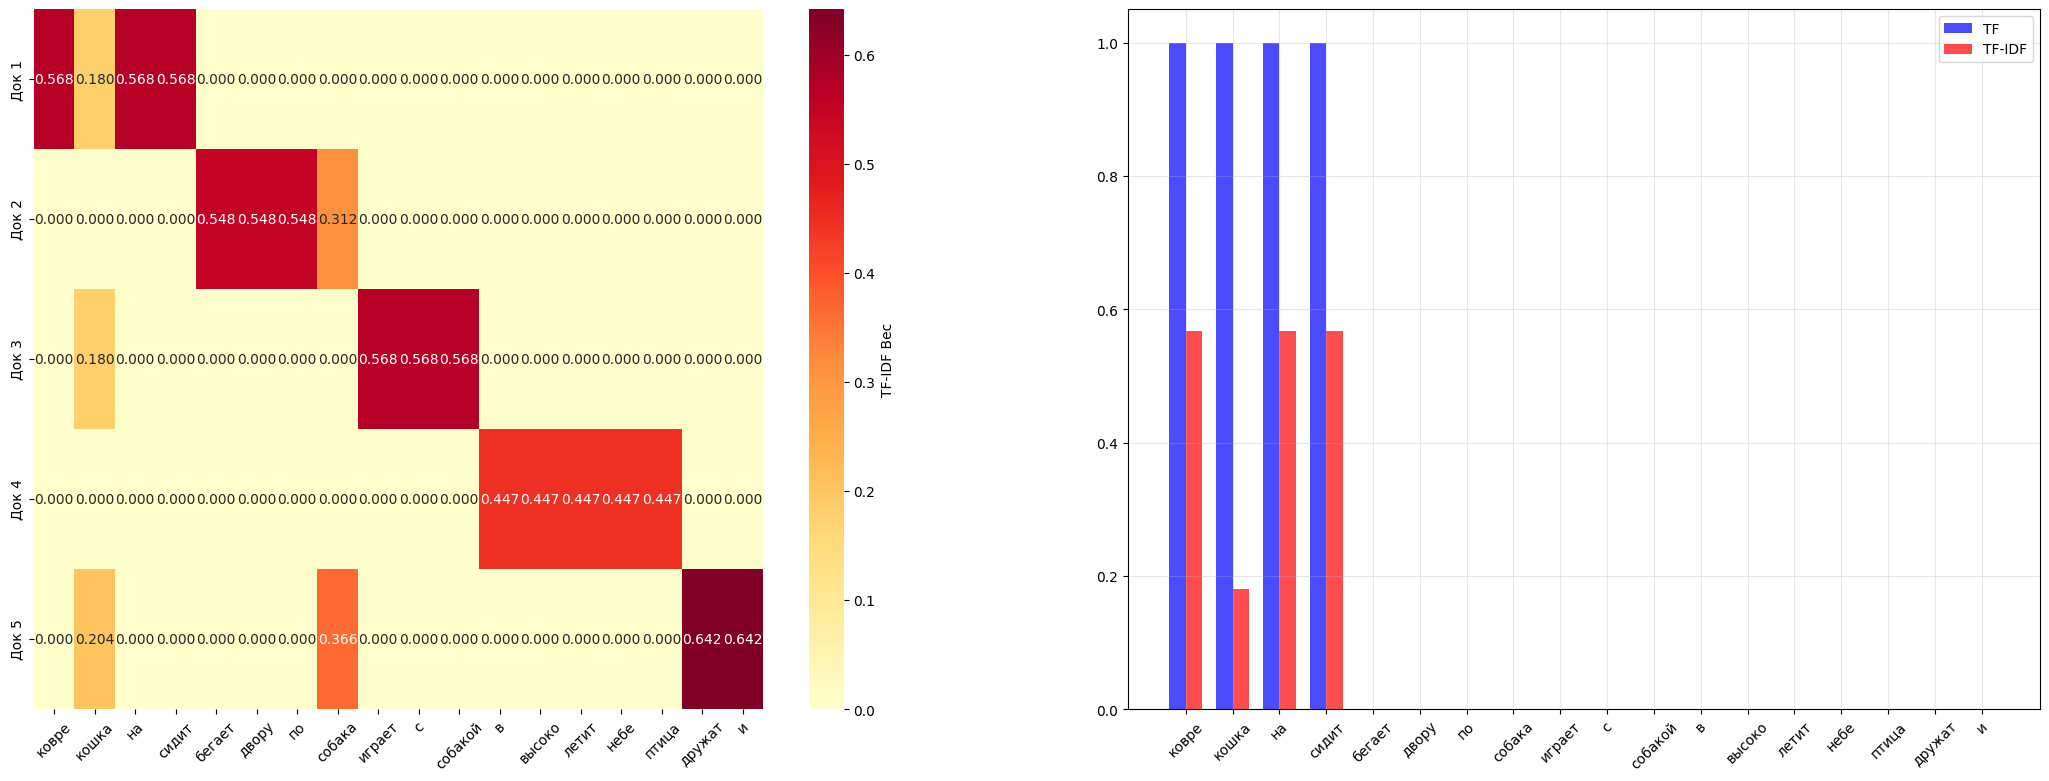

In [ ]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [ ]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3    Д4    Д5
Д1  1.000  0.856  0.811  0.873  0.873
Д2  0.856  1.000  0.784  0.859  0.

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [ ]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-09 18:18:14--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.009s  

2025-11-09 18:18:14 (11.4 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [ ]:
import csv

with open('test.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)

print(data)

[['text', 'label', 'source'], ['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ', 'negative', 'sem_eval_2017'], ['#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ', 'neutral', 'sem_eval_2017'], ['@user You are a stand up guy and a Gentleman Vice President Pence ', 'positive', 'sem_eval_2017'], ["@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ", 'negative', 'sem_eval_2017'], ['perfect pussy clips #vanessa hudgens zac efron naked ', 'neutral', 'sem_eval_2017'], ["i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ", 'positive', 'sem_eval_2017'], ['@user for al the crying you do about how middle America is left out-they have twice as much voting power ', 'negative', 'sem_eval_2017'], ['Sentinel Editorial: FBI’s Comey ‘had no one of 

3. Извлечь столбец с текстами (макс. балл == 1)

In [ ]:
import csv

with open('test.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)

    # Пропустить заголовок если есть
    next(csv_reader, None)

    # Извлечь первый столбец (индекс 0)
    text_column = [row[0] for row in csv_reader]

print(text_column)

['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ', '#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ', '@user You are a stand up guy and a Gentleman Vice President Pence ', "@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ", 'perfect pussy clips #vanessa hudgens zac efron naked ', "i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ", '@user for al the crying you do about how middle America is left out-they have twice as much voting power ', 'Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. ', 'Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News ', 'Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @user ', 'Presentin

4. Построить Bag-of-Words (макс. балл == 3)

ЗАДАЧА 1.1: СОЗДАНИЕ СЛОВАРЯ И BOW ПРЕДСТАВЛЕНИЯ

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат

Предобработанные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат

Токенизированные документы:
Документ 1: ['кошка', 'сидит', 'на', 'ковре']
Документ 2: ['собака', 'бегает', 'по', 'двору']
Документ 3: ['кошка', 'играет', 'с', 'собакой']
Документ 4: ['птица', 'летит', 'высоко', 'в', 'небе']
Документ 5: ['собака', 'и', 'кошка', 'дружат']

Словарь (размер: 18):
{'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 

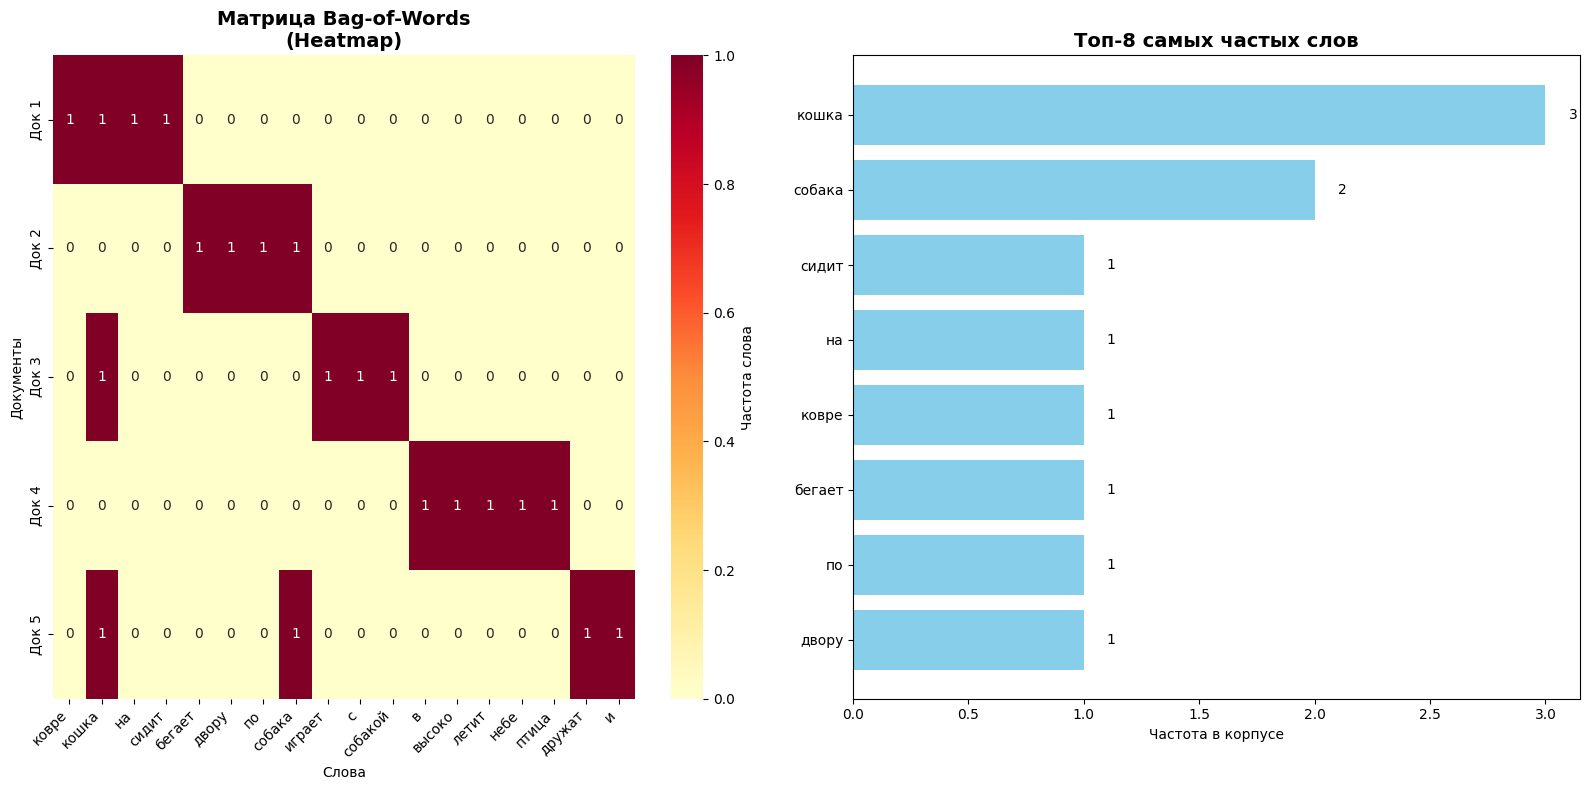


СТАТИСТИКА КОРПУСА:
Общее количество документов: 5
Размер словаря: 18
Общее количество слов в корпусе: 21
Средняя длина документа: 4.2 слов
Словарь: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']

Топ-5 самых частых слов:
1. 'кошка': 3 раз (3 документов, 14.3% корпуса)
5. 'собака': 2 раз (2 документов, 9.5% корпуса)
2. 'сидит': 1 раз (1 документов, 4.8% корпуса)
3. 'на': 1 раз (1 документов, 4.8% корпуса)
4. 'ковре': 1 раз (1 документов, 4.8% корпуса)


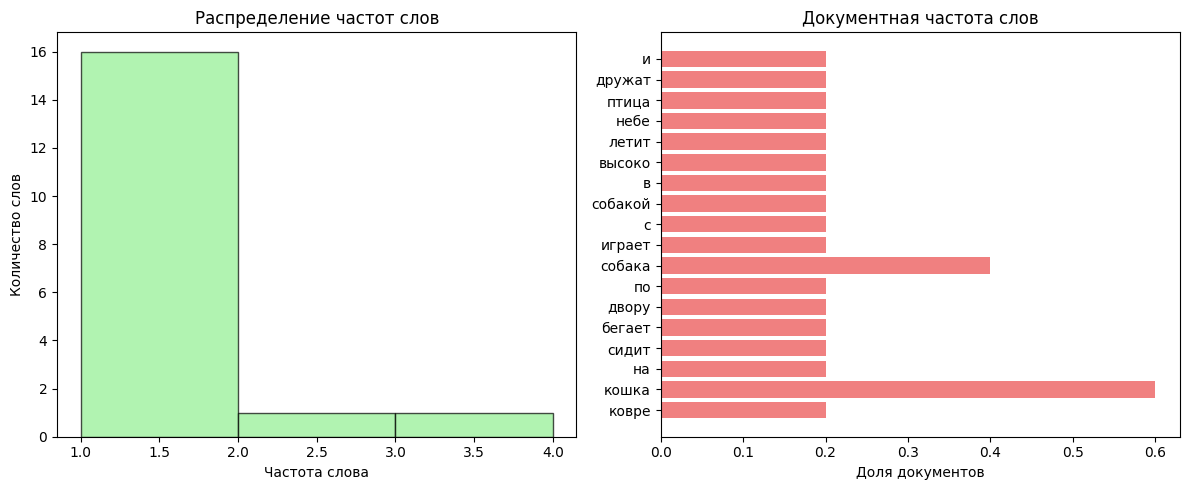


АНАЛИЗ РЕЗУЛЬТАТОВ:
Все тексты приведены к нижнему регистру
Знаки препинания удалены
Словарь построен с использованием gensim
Документы преобразованы в BoW векторы
Создана таблица частот слов
Построен heatmap матрицы BoW
Определены самые частые слова в корпусе


In [ ]:
!pip install gensim
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re

# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("=" * 60)
print("ЗАДАЧА 1.1: СОЗДАНИЕ СЛОВАРЯ И BOW ПРЕДСТАВЛЕНИЯ")
print("=" * 60)

print("\nИсходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

# Шаг 1: Предобработка текстов
def preprocess_text(text):
    """Приведение к нижнему регистру и удаление знаков препинания"""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # удаляем знаки препинания
    text = re.sub(r'\s+', ' ', text).strip()  # удаляем лишние пробелы
    return text

# Применяем предобработку
processed_docs = [preprocess_text(doc) for doc in documents]

print("\nПредобработанные документы:")
for i, doc in enumerate(processed_docs, 1):
    print(f"{i}. {doc}")

# Шаг 2: Токенизация
tokenized_docs = [doc.split() for doc in processed_docs]
print("\nТокенизированные документы:")
for i, tokens in enumerate(tokenized_docs, 1):
    print(f"Документ {i}: {tokens}")

# Шаг 3: Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"\nСловарь (размер: {len(dictionary)}):")
print(dictionary.token2id)

# Шаг 4: Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("\nBag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("\nПлотные векторы Bag-of-Words:")
words = list(dictionary.token2id.keys())
print("Слова:", words)
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

print("\n" + "=" * 60)
print("ЗАДАЧА 1.2: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 60)

# 1. Создаем таблицу частот слов
print("\n1. ТАБЛИЦА ЧАСТОТ СЛОВ:")

# Собираем статистику по всему корпусу
all_words = []
for doc in tokenized_docs:
    all_words.extend(doc)

word_freq = Counter(all_words)
total_words = len(all_words)

# Создаем таблицу частот
freq_table = pd.DataFrame({
    'Слово': list(word_freq.keys()),
    'Частота': list(word_freq.values()),
    'Доля в корпусе': [freq/total_words for freq in word_freq.values()],
    'Кол-во документов': [(np.array(dense_vectors)[:, list(dictionary.token2id.keys()).index(word)] > 0).sum()
                         for word in word_freq.keys()]
})

# Сортируем по частоте
freq_table = freq_table.sort_values('Частота', ascending=False)
print(freq_table.to_string(index=False))

# 2. Heatmap матрицы BoW
print("\n2. HEATMAP МАТРИЦЫ BOW:")

matrix = np.array(dense_vectors)
doc_names = [f"Док {i+1}" for i in range(len(documents))]

plt.figure(figsize=(16, 8))

# Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'Частота слова'})
plt.title('Матрица Bag-of-Words\n(Heatmap)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Документы')
plt.xlabel('Слова')

# 3. Самые частые слова в корпусе
print("\n3. САМЫЕ ЧАСТЫЕ СЛОВА В КОРПУСЕ:")

plt.subplot(1, 2, 2)
top_n = min(8, len(word_freq))
top_words = freq_table.head(top_n)

plt.barh(range(len(top_words)), top_words['Частота'], color='skyblue')
plt.yticks(range(len(top_words)), top_words['Слово'])
plt.xlabel('Частота в корпусе')
plt.title(f'Топ-{top_n} самых частых слов', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Добавляем значения на столбцы
for i, v in enumerate(top_words['Частота']):
    plt.text(v + 0.1, i, str(v), va='center')

plt.tight_layout()
plt.show()

# Дополнительная статистика
print("\n" + "=" * 60)
print("СТАТИСТИКА КОРПУСА:")
print("=" * 60)
print(f"Общее количество документов: {len(documents)}")
print(f"Размер словаря: {len(dictionary)}")
print(f"Общее количество слов в корпусе: {total_words}")
print(f"Средняя длина документа: {total_words/len(documents):.1f} слов")
print(f"Словарь: {list(dictionary.token2id.keys())}")

print(f"\nТоп-5 самых частых слов:")
for i, row in freq_table.head().iterrows():
    print(f"{i+1}. '{row['Слово']}': {row['Частота']} раз " +
          f"({row['Кол-во документов']} документов, " +
          f"{row['Доля в корпусе']*100:.1f}% корпуса)")

# Дополнительная визуализация: распределение частот слов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Распределение частот слов
freq_distribution = list(word_freq.values())
plt.hist(freq_distribution, bins=range(1, max(freq_distribution)+2),
         alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Частота слова')
plt.ylabel('Количество слов')
plt.title('Распределение частот слов')

plt.subplot(1, 2, 2)
# Доля документов, содержащих слово
doc_freq = [(np.array(dense_vectors)[:, i] > 0).sum() / len(documents)
           for i in range(len(words))]
plt.barh(words, doc_freq, color='lightcoral')
plt.xlabel('Доля документов')
plt.title('Документная частота слов')
plt.tight_layout()

plt.show()

print("\n" + "=" * 60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("=" * 60)
print("Все тексты приведены к нижнему регистру")
print("Знаки препинания удалены")
print("Словарь построен с использованием gensim")
print("Документы преобразованы в BoW векторы")
print("Создана таблица частот слов")
print("Построен heatmap матрицы BoW")
print("Определены самые частые слова в корпусе")

5. Построить TF-IDF (макс. балл == 5)

ЗАДАЧА 2.1: ПРИМЕНЕНИЕ TF-IDF К BOW ПРЕДСТАВЛЕНИЮ
Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат

Словарь (18 слов): ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']

--------------------------------------------------
ПРИМЕНЕНИЕ TF-IDF
--------------------------------------------------
TF-IDF векторы (слово: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', n

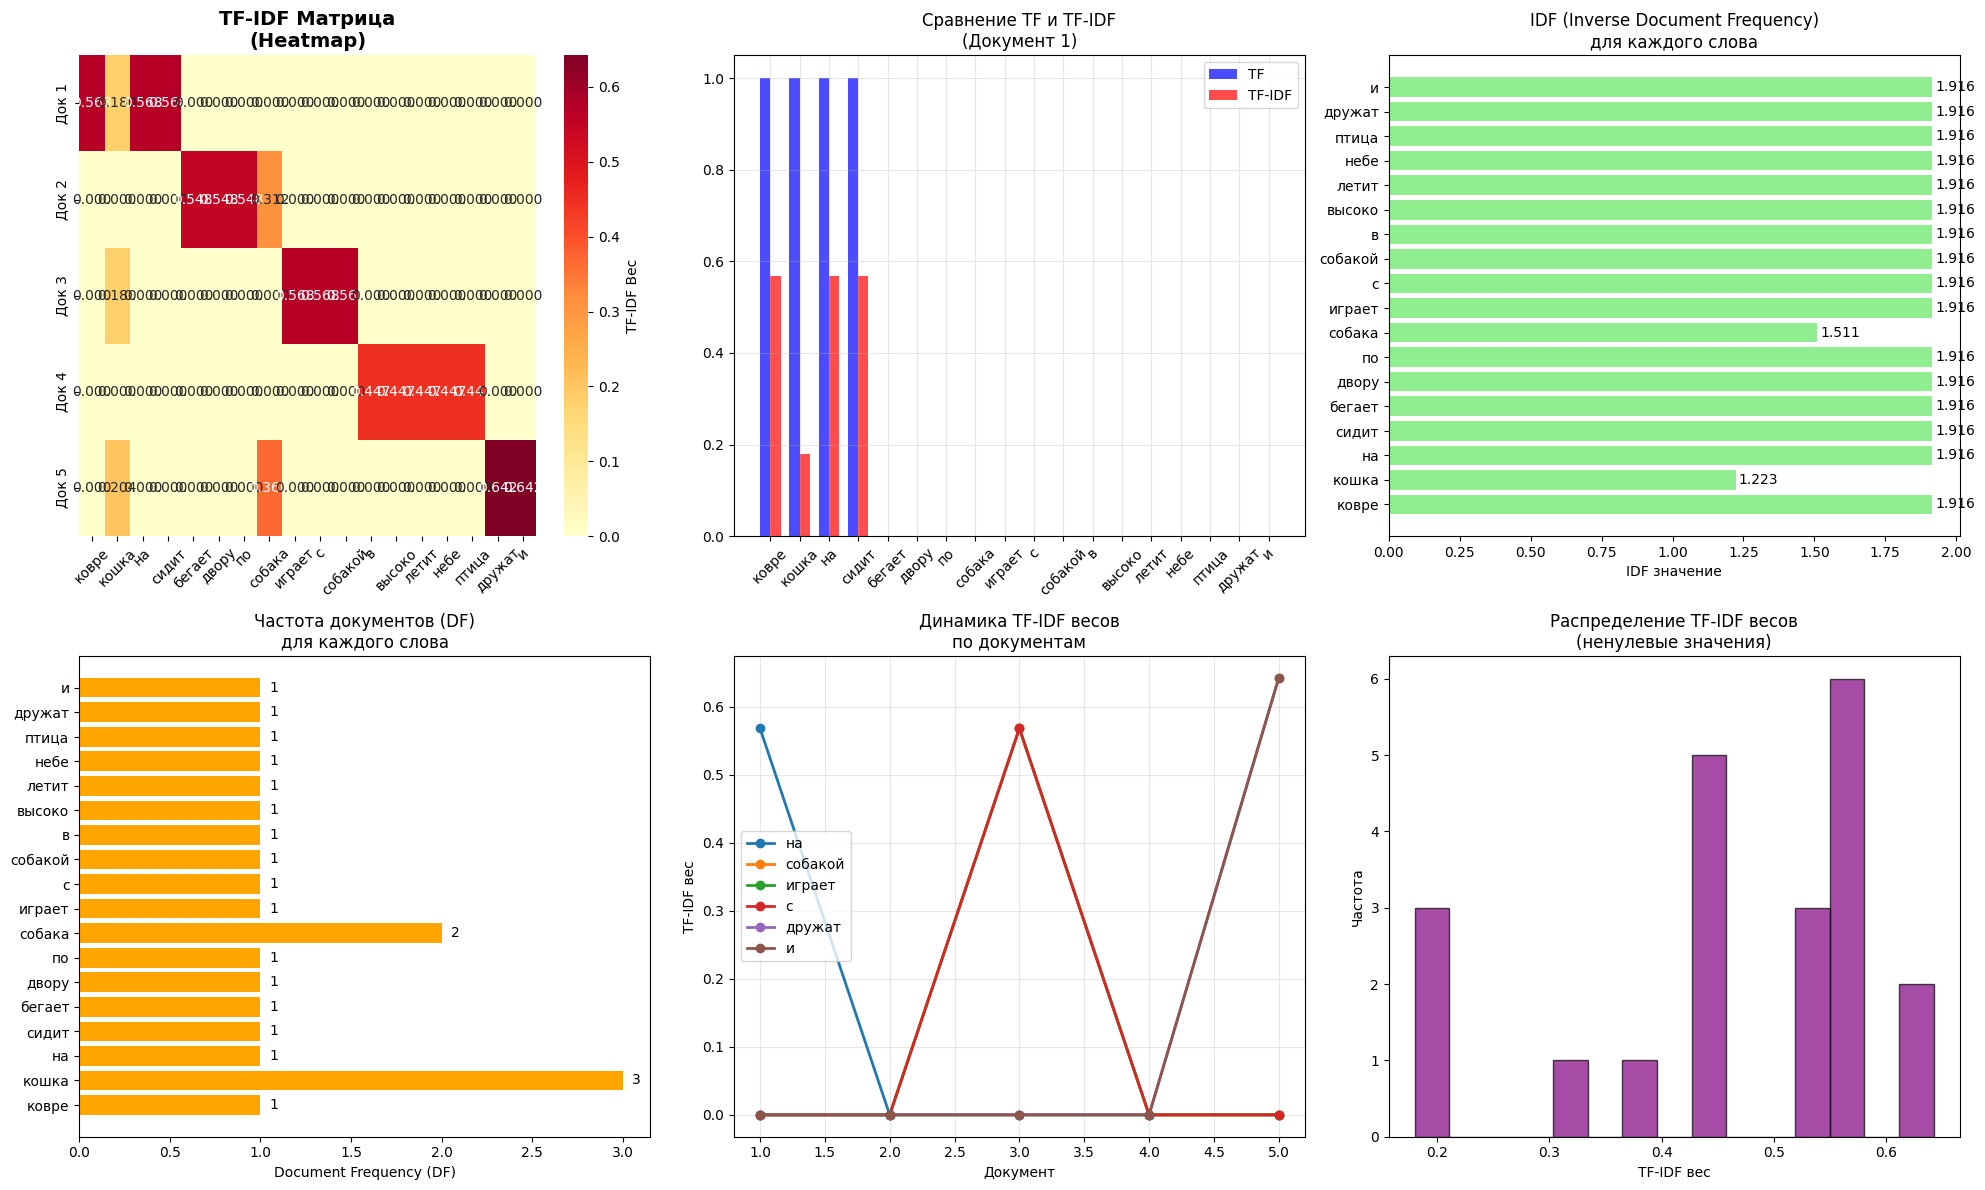


АНАЛИЗ САМЫХ ВАЖНЫХ СЛОВ ПО TF-IDF
Рейтинг слов по максимальному TF-IDF весу:
--------------------------------------------------
1. 'и': TF-IDF=0.642 (док 5), DF=1, IDF=1.916
2. 'дружат': TF-IDF=0.642 (док 5), DF=1, IDF=1.916
3. 'с': TF-IDF=0.568 (док 3), DF=1, IDF=1.916
4. 'играет': TF-IDF=0.568 (док 3), DF=1, IDF=1.916
5. 'собакой': TF-IDF=0.568 (док 3), DF=1, IDF=1.916
6. 'на': TF-IDF=0.568 (док 1), DF=1, IDF=1.916
7. 'ковре': TF-IDF=0.568 (док 1), DF=1, IDF=1.916
8. 'сидит': TF-IDF=0.568 (док 1), DF=1, IDF=1.916
9. 'по': TF-IDF=0.548 (док 2), DF=1, IDF=1.916
10. 'двору': TF-IDF=0.548 (док 2), DF=1, IDF=1.916
11. 'бегает': TF-IDF=0.548 (док 2), DF=1, IDF=1.916
12. 'в': TF-IDF=0.447 (док 4), DF=1, IDF=1.916
13. 'летит': TF-IDF=0.447 (док 4), DF=1, IDF=1.916
14. 'высоко': TF-IDF=0.447 (док 4), DF=1, IDF=1.916
15. 'птица': TF-IDF=0.447 (док 4), DF=1, IDF=1.916
16. 'небе': TF-IDF=0.447 (док 4), DF=1, IDF=1.916
17. 'собака': TF-IDF=0.366 (док 5), DF=2, IDF=1.511
18. 'кошка': TF-IDF=0.20

In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re

# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("=" * 60)
print("ЗАДАЧА 2.1: ПРИМЕНЕНИЕ TF-IDF К BOW ПРЕДСТАВЛЕНИЮ")
print("=" * 60)

# Предобработка и токенизация
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

processed_docs = [preprocess_text(doc) for doc in documents]
tokenized_docs = [doc.split() for doc in processed_docs]

# Создание словаря и BoW
dictionary = corpora.Dictionary(tokenized_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

print(f"\nСловарь ({len(dictionary)} слов): {list(dictionary.token2id.keys())}")

# Задача 2.1: Применяем TF-IDF
print("\n" + "-" * 50)
print("ПРИМЕНЕНИЕ TF-IDF")
print("-" * 50)

tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (слово: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    word_scores = [(dictionary[idx], round(score, 3)) for idx, score in doc_vec]
    print(f"Документ {i}: {word_scores}")

# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

print("\n" + "=" * 60)
print("ЗАДАЧА 2.2: АНАЛИЗ ВЕСОВ TF-IDF")
print("=" * 60)

# Вычисляем все компоненты вручную для анализа
N = len(documents)  # общее количество документов

# TF (Term Frequency) - просто частоты из BoW
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# DF (Document Frequency) - количество документов, содержащих слово
df_vector = (tf_matrix > 0).sum(axis=0)

# IDF (Inverse Document Frequency) по формуле gensim
# IDF(t) = log(N / (DF(t) + 1)) + 1
idf_vector = np.log(N / (df_vector + 1)) + 1

# TF-IDF вручную для проверки
tfidf_manual = tf_matrix * idf_vector

print("\nДЕТАЛЬНЫЙ АНАЛИЗ ДЛЯ КАЖДОГО СЛОВА:")
print("-" * 80)

# Создаем детальную таблицу для анализа
analysis_data = []

for word_idx, word in enumerate(words):
    word_data = {
        'Слово': word,
        'DF': df_vector[word_idx],
        'IDF': round(idf_vector[word_idx], 4),
        'IDF_формула': f"log({N}/({df_vector[word_idx]}+1))+1 = {round(idf_vector[word_idx], 4)}"
    }

    # Добавляем TF для каждого документа
    for doc_idx in range(N):
        word_data[f'TF_Док{doc_idx+1}'] = tf_matrix[doc_idx, word_idx]
        word_data[f'TF-IDF_Док{doc_idx+1}'] = round(tfidf_manual[doc_idx, word_idx], 4)

    analysis_data.append(word_data)

# Создаем DataFrame для анализа
analysis_df = pd.DataFrame(analysis_data)

# Переупорядочиваем колонки для лучшего отображения
columns_order = ['Слово', 'DF', 'IDF', 'IDF_формула']
for doc_idx in range(N):
    columns_order.extend([f'TF_Док{doc_idx+1}', f'TF-IDF_Док{doc_idx+1}'])

analysis_df = analysis_df[columns_order]

print("\nПОЛНАЯ ТАБЛИЦА TF-IDF АНАЛИЗА:")
print(analysis_df.to_string(index=False))

# Создаем CSV файл с результатами
csv_filename = "tfidf_analysis.csv"
analysis_df.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"\n Результаты сохранены в файл: {csv_filename}")

# Визуализация результатов
plt.figure(figsize=(20, 12))

# 1. Heatmap TF-IDF матрицы
plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.title('TF-IDF Матрица\n(Heatmap)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# 2. Сравнение TF и TF-IDF для первого документа
plt.subplot(2, 3, 2)
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.title(f'Сравнение TF и TF-IDF\n(Документ {doc_idx+1})', fontsize=12)
plt.grid(True, alpha=0.3)

# 3. Значения IDF для каждого слова
plt.subplot(2, 3, 3)
plt.barh(words, idf_vector, color='lightgreen')
plt.xlabel('IDF значение')
plt.title('IDF (Inverse Document Frequency)\nдля каждого слова', fontsize=12)
for i, v in enumerate(idf_vector):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

# 4. Document Frequency (DF)
plt.subplot(2, 3, 4)
plt.barh(words, df_vector, color='orange')
plt.xlabel('Document Frequency (DF)')
plt.title('Частота документов (DF)\nдля каждого слова', fontsize=12)
for i, v in enumerate(df_vector):
    plt.text(v + 0.05, i, str(v), va='center')

# 5. Сравнение TF-IDF весов между документами для топ-слов
plt.subplot(2, 3, 5)
top_words_idx = np.argsort(np.max(tfidf_matrix, axis=0))[-6:]  # топ-6 слов по максимальному TF-IDF
top_words = [words[i] for i in top_words_idx]

for i, word_idx in enumerate(top_words_idx):
    plt.plot(range(1, N+1), tfidf_matrix[:, word_idx],
             marker='o', label=words[word_idx], linewidth=2)
plt.xlabel('Документ')
plt.ylabel('TF-IDF вес')
plt.title('Динамика TF-IDF весов\nпо документам', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Распределение TF-IDF весов
plt.subplot(2, 3, 6)
flat_tfidf = tfidf_matrix.flatten()
flat_tfidf = flat_tfidf[flat_tfidf > 0]  # убираем нули
plt.hist(flat_tfidf, bins=15, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('TF-IDF вес')
plt.ylabel('Частота')
plt.title('Распределение TF-IDF весов\n(ненулевые значения)', fontsize=12)

plt.tight_layout()
plt.show()

# Дополнительный анализ: самые важные слова по TF-IDF
print("\n" + "=" * 60)
print("АНАЛИЗ САМЫХ ВАЖНЫХ СЛОВ ПО TF-IDF")
print("=" * 60)

# Находим максимальные TF-IDF веса для каждого слова
max_tfidf_per_word = np.max(tfidf_matrix, axis=0)
important_words_idx = np.argsort(max_tfidf_per_word)[::-1]

print("Рейтинг слов по максимальному TF-IDF весу:")
print("-" * 50)
for rank, word_idx in enumerate(important_words_idx, 1):
    word = words[word_idx]
    max_tfidf = max_tfidf_per_word[word_idx]
    doc_with_max = np.argmax(tfidf_matrix[:, word_idx]) + 1
    df_val = df_vector[word_idx]
    idf_val = idf_vector[word_idx]

    print(f"{rank}. '{word}': TF-IDF={max_tfidf:.3f} (док {doc_with_max}), "
          f"DF={df_val}, IDF={idf_val:.3f}")

# Проверка корректности вычислений
print("\n" + "=" * 60)
print("ПРОВЕРКА КОРРЕКТНОСТИ ВЫЧИСЛЕНИЙ")
print("=" * 60)

print("Сравнение TF-IDF из gensim и ручных вычислений:")
print("Слово\t\tGensim TF-IDF\tРучной TF-IDF\tРазница")
print("-" * 60)
for word_idx, word in enumerate(words):
    # Берем первый документ, где слово встречается
    doc_with_word = np.where(tf_matrix[:, word_idx] > 0)[0]
    if len(doc_with_word) > 0:
        doc_idx = doc_with_word[0]
        gensim_tfidf = tfidf_matrix[doc_idx, word_idx]
        manual_tfidf = tfidf_manual[doc_idx, word_idx]
        diff = abs(gensim_tfidf - manual_tfidf)
        print(f"{word:12}\t{gensim_tfidf:.4f}\t\t{manual_tfidf:.4f}\t\t{diff:.6f}")

print(f"\n Файл '{csv_filename}' успешно создан и сохранен в текущей директории")
print("Все вычисления завершены успешно")
print("Визуализации построены")

# Выводим формулу для ясности
print("\n" + "=" * 60)
print("ФОРМУЛЫ ИСПОЛЬЗОВАННЫЕ В ВЫЧИСЛЕНИЯХ:")
print("=" * 60)
print("1. TF(t,d) = count(t,d)  # количество вхождений слова t в документ d")
print("2. DF(t) = количество документов, содержащих слово t")
print("3. IDF(t) = log(N / (DF(t) + 1)) + 1  # сглаживание по формуле gensim")
print("4. TF-IDF(t,d) = TF(t,d) × IDF(t)")
print(f"где N = {N} (общее количество документов)")

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```